Question 1

## Part 1
![Network Diagram](flowchart1a.jpg)

Part 2

Even though this is not specified in the problem, because this is a binary classification problem with a single output, we should use a sigmoid activation function for the output layer. That will be reflected throughout the problem.

$y = \sigma(v_1h_1 + v_2h_2 + v_3h_3 + v_4h_4 + c) = \sigma (ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)$

In [7]:
## Part 3
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Define functions that will be used in this forward pass
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def ff_nn_ReLU(W,B,c,V,x):
    return sigmoid(np.dot(V,tf.nn.relu(np.dot(x,W)+B))+c)

In [8]:
## Part 4

# First pass - x = [1,-1]
W = np.array([[1,-1,0,1],[0,0,.5,1]])
B = np.array([0,0,1,0])
c = 1
V = np.array([1,0,-1,1]).T

x_1 = np.array([1,-1])
ff_nn_ReLU(W,B,c,V,x_1)

0.8175744761936437

In [9]:
# Second pass - x = [0,-1]
x_2 = np.array([0,-1])
ff_nn_ReLU(W,B,c,V,x_2)

0.6224593312018546

In [10]:
# Third pass - x = [0,11]
x_3 = np.array([0,1])
ff_nn_ReLU(W,B,c,V,x_3)

0.6224593312018546

Question 2

Part 1

$\frac{\partial f}{\partial x} = -3x^2 - 100y^2 + 100x$

$\frac{\partial f}{\partial y} = 800y^3 - 200yx$

Text(0.5, 0, 'z')

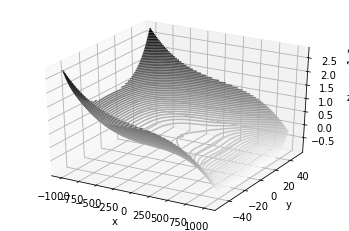

In [11]:
## Part 2
def f(x, y):
    return (3-x**3) + 50*((2*y**2 - x)**2)

x = np.linspace(-1000,1000,1000)
y = np.linspace(-50,50,1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.set_zlim(0,1.2)
ax.contour3D(X, Y, Z, 80, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


In [12]:
## Part 3
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) - 100*(y**2) + 100*x
    df_dy = 800*(y**3) - 200*y*x
    return np.array([df_dx, df_dy])



def grad_descent(starting_point=None, iterations=10, learning_rate=2):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
        
    trajectory = [point]
    
    for i in range(iterations):
        grad=grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)

    return np.array(trajectory)

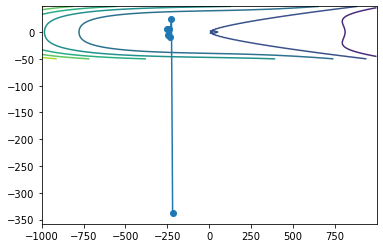

In [13]:
np.random.seed(10)
traj = grad_descent(starting_point=[-250,5],iterations=5, learning_rate=.00003)

delta = 2
x = np.arange(-1000,1000, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

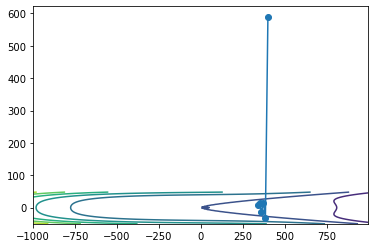

In [239]:
np.random.seed(10)
traj = grad_descent(starting_point=[341.5,7],iterations=5, learning_rate=.00003)

delta = 2
x = np.arange(-1000,1000, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

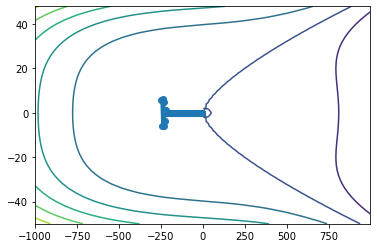

In [182]:
np.random.seed(10)
traj = grad_descent(starting_point=[-250,6],iterations=1000, learning_rate=.0000255)

delta = 2
x = np.arange(-1000,1000, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

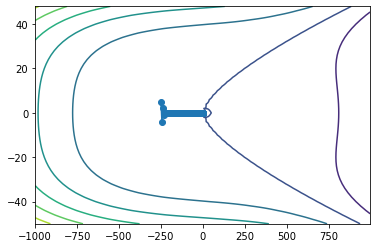

In [240]:
np.random.seed(10)
traj = grad_descent(starting_point=[-250,5],iterations=10000, learning_rate=.0000257)

delta = 2
x = np.arange(-1000,1000, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

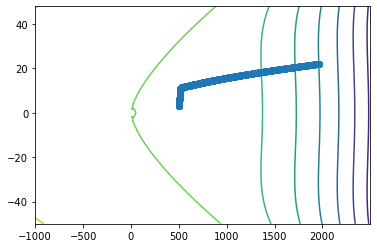

In [223]:
np.random.seed(10)
traj = grad_descent(starting_point=[500,3],iterations=2000, learning_rate=.000000257)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

The above plots show that starting position and learning rate are EXTREMELY IMPACTFUL. If the learning rate is sufficiently large, regardless of the starting x value, the steps are too large to land in the middle of the trough and they instead keep overshooting by more and more as the walls steepen and the gradient at each step therefore increases. If the learning rate is decreased very slightly and starting x is negative and the absolute value of starting y is not too large, the steps are too small to overshoot in a positive feedback loop form, and they instead never leave the flat section. The same goes for if the starting point is well within the flat region, in which case the magnitudes of the gradient vectors are insufficient to get off of the flat part and start excessively overshooting. All of these situations, however, do not actually pursue the global minimum (which is negative infinity) because they get stuck in the flat area around the origin. Starting with a positive x value, small y absolute value, and extremely small step size is a recipe that results in the gradient descent properly pursuing its intended goal.

In [14]:
## Part 4

def grad_descent_with_mo(starting_point=None, iterations=10, alpha=.7, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point = starting_point
        
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad=grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)

        
    return np.array(trajectory)

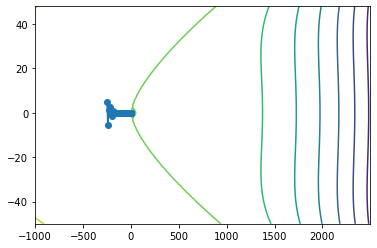

In [15]:
traj = grad_descent_with_mo(starting_point=np.array([-250,5]),iterations=1000, epsilon=.00003, alpha=.5)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

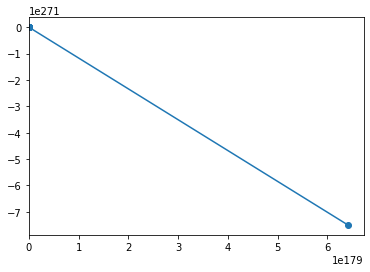

In [282]:
traj = grad_descent_with_mo(starting_point=np.array([341.5,7]),iterations=9, epsilon=.00003, alpha=.5)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

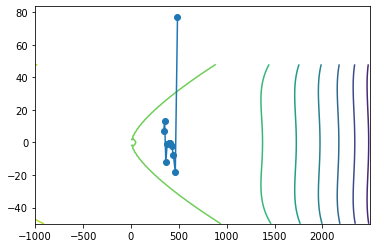

In [281]:
traj = grad_descent_with_mo(starting_point=np.array([341.5,7]),iterations=9, epsilon=.00003, alpha=.2)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

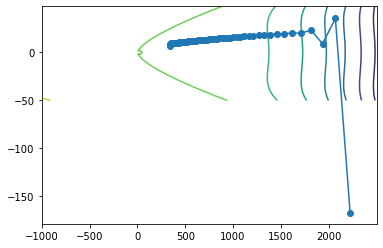

In [306]:
traj = grad_descent_with_mo(starting_point=np.array([341.5,7]),iterations=72, epsilon=.00001, alpha=.2)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

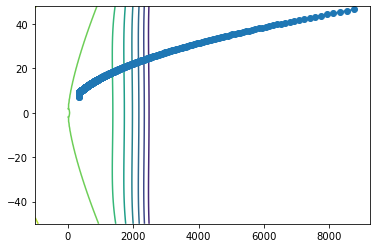

In [314]:
traj = grad_descent_with_mo(starting_point=np.array([341.5,7]),iterations=950, epsilon=.000001, alpha=0.03)

delta = 2
x = np.arange(-1000,2500, delta)
y = np.arange(-50,50, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*((2*Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

With the same learning rate setting (.00003) and starting point (-250,5) that led to increasing overshooting in the y direction without momentum, we see an ability to stay in the flat area when a momentum weight of .5 is incorporated. In the case of a (350,7) starting point, the function is too flat and an alpha (momentum weight) value of .5 is too strong, still pushing increasing overshooting in the y direction. But an alpha of .2 with that starting position shows some initial promise before falling into the overshooting cycle. If we keep the alpha hyperparameters constant but decrease epsilon (learning rate), we see that, tracking towards negative infinity by moving in the negative x direction, the proper destination for gradient descent in this case, things start off really well, but the momentum component, despite making things move faster in the x direction, also ends up leading to the overshooting cycle in the y direction. With a much decreased epsilon and still-small alpha, we see gradient descent actually take the path that we intend. This function shows the dangers of including a momentum weight as well as the benefits and dangers of very small step size (benefit - less prone to getting caught in the overshooting cycle; dangers - computationally costly because it takes a large number of iterations, and prone to getting stuck in a local minimum as we saw in the first case).

Question 3

Part 1

In the partial derivatives below, I use $u$ to represent the term that is provide to the output node and upon which the sigmoid activation function acts.

$\frac{\partial L}{\partial v_1} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial v_1} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(ReLU(w_{11}x_1 + w_{21}x_2 + b_1))$


$\frac{\partial L}{\partial v_2} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial v_2} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(ReLU(w_{12}x_1 + w_{22}x_2 + b_2)) $


$\frac{\partial L}{\partial v_3} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial v_3} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}) \sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(ReLU(w_{13}x_1 + w_{23}x_2 + b_3)) $


$\frac{\partial L}{\partial v_4} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial v_4} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(ReLU(w_{14}x_1 + w_{24}x_2 + b_4)) $


$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial c} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(1) $


$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial b_1} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_1)(1)(1)$ if $w_{11}x_1 + w_{21}x_2 + b_2 > 0$, 0 if $w_{11}x_1 + w_{21}x_2 + b_1 < 0$


$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial b_2} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_2)(1)(1)$ if $w_{12}x_1 + w_{22}x_2 + b_2 > 0$, 0 if $w_{12}x_1 + w_{22}x_2 + b_2 < 0$


$\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial b_3} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_3)(1)(1)$ if $w_{13}x_1 + w_{23}x_2 + b_3 > 0$, 0 if $w_{13}x_1 + w_{23}x_2 + b_3 < 0$


$\frac{\partial L}{\partial b_4} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_4}\frac{\partial out_4}{\partial in_4}\frac{\partial in_4}{\partial b_4} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_4)(1)(1)$ if $w_{14}x_1 + w_{24}x_2 + b_4 > 0$, 0 if $w_{14}x_1 + w_{24}x_2 + b_4 < 0$



$\frac{\partial L}{\partial w_{11}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial w_{11}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_1)(1)(x_1)$ if $w_{11}x_1 + w_{21}x_2 + b_1 > 0$, 0 if $w_{11}x_1 + w_{21}x_2 + b_1 < 0$


$\frac{\partial L}{\partial w_{21}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial w_{21}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_1)(1)(x_2)$ if $w_{11}x_1 + w_{21}x_2 + b_1 > 0$, 0 if $w_{11}x_1 + w_{21}x_2 + b_1 < 0$


$\frac{\partial L}{\partial w_{12}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial w_{12}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_2)(1)(x_1)$ if $w_{12}x_1 + w_{22}x_2 + b_2 > 0$, 0 if $w_{12}x_1 + w_{22}x_2 + b_2 < 0$


$\frac{\partial L}{\partial w_{22}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial w_{22}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_2)(1)(x_2)$ if $w_{12}x_1 + w_{22}x_2 + b_2 > 0$, 0 if $w_{12}x_1 + w_{22}x_2 + b_2 < 0$


$\frac{\partial L}{\partial w_{13}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial w_{13}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_3)(1)(x_1)$ if $w_{13}x_1 + w_{23}x_2 + b_3 > 0$, 0 if $w_{13}x_1 + w_{23}x_2 + b_3 < 0$


$\frac{\partial L}{\partial w_{23}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial w_{23}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_3)(1)(x_2)$ if $w_{13}x_1 + w_{23}x_2 + b_3 > 0$, 0 if $w_{13}x_1 + w_{23}x_2 + b_3 < 0$


$\frac{\partial L}{\partial w_{14}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_4}\frac{\partial out_4}{\partial in_4}\frac{\partial in_4}{\partial w_{14}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_4)(1)(x_1)$ if $w_{14}x_1 + w_{24}x_2 + b_4 > 0$, 0 if $w_{14}x_1 + w_{24}x_2 + b_4 < 0$


$\frac{\partial L}{\partial w_{24}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_4}\frac{\partial out_4}{\partial in_4}\frac{\partial in_4}{\partial w_{24}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_4)(1)(x_2)$ if $w_{14}x_1 + w_{24}x_2 + b_4 > 0$, 0 if $w_{14}x_1 + w_{24}x_2 + b_4 < 0$

$\frac{\partial L}{\partial w_{11}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial u}\frac{\partial u}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial w_{11}} = -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}})\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c)(1-\sigma(ReLU(w_{11}x_1 + w_{21}x_2 + b_1)v_1 + ReLU(w_{12}x_1 + w_{22}x_2 + b_2)v_2 + ReLU(w_{13}x_1 + w_{23}x_2 + b_3)v_3 + ReLU(w_{14}x_1 + w_{24}x_2 + b_4)v_4 + c))(v_1)(1)(x_1)$ if $w_{11}x_1 + w_{21}x_2 + b_1 > 0$, 0 if $w_{11}x_1 + w_{21}x_2 + b_1 < 0$

In [561]:
## Part 2

def sigmoid(z):
    return 1/(1+ np.exp(-z))

def ff_nn_ReLU(W,B,c,V,x):
    #results = []
    #output = np.dot(tf.nn.relu(np.dot(x,W)+B),V)+c
    #for i in range(x.shape[0]):
    #    results.append(sigmoid(output[i]))
    #    print(sigmoid(output[i]))
    #print(results)
    #print(np.array([results]).T)
    #return np.array([results]).T
    #print(tf.nn.sigmoid(np.dot(tf.nn.relu(np.dot(x,W)+B),V)+c))
    return tf.nn.sigmoid(np.dot(tf.nn.relu(np.dot(x,W)+B),V)+c)

#def relu(x):
#    return max(0,x)

def relu_deriv(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def grad_f(w,b,c,v,x,y,yhat,n):
    
    y=y.reshape(y.shape[0],1)
    yhat = np.array(yhat).reshape(yhat.shape[0],1)
    
    dL_dv1 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*tf.nn.relu(w[0,0]*x[:,0]+w[1,0]*x[:,1]+b[0,0]))
    dL_dv2 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*tf.nn.relu(w[0,1]*x[:,0]+w[1,1]*x[:,1]+b[0,1]))
    dL_dv3 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*tf.nn.relu(w[0,2]*x[:,0]+w[1,2]*x[:,1]+b[0,2]))
    dL_dv4 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*tf.nn.relu(w[0,3]*x[:,0]+w[1,3]*x[:,1]+b[0,3]))
    dL_dc = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat))
    dL_db1 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[0,0]*relu_deriv(w[0,0]*x[:,0] + w[1,0]*x[:,1] + b[0,0])).reshape(n,1))
    dL_db2 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[1,0]*relu_deriv(w[0,1]*x[:,0] + w[1,1]*x[:,1] + b[0,1])).reshape(n,1))
    dL_db3 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[2,0]*relu_deriv(w[0,2]*x[:,0] + w[1,2]*x[:,1] + b[0,2])).reshape(n,1))
    dL_db4 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[3,0]*relu_deriv(w[0,3]*x[:,0] + w[1,3]*x[:,1] + b[0,3])).reshape(n,1))
    dL_dw11 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[0,0]*relu_deriv(w[0,0]*x[:,0] + w[1,0]*x[:,1] + b[0,0])*x[:,0]).reshape(n,1))
    dL_dw21 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[0,0]*relu_deriv(w[0,0]*x[:,0] + w[1,0]*x[:,1] + b[0,0])*x[:,1]).reshape(n,1))
    dL_dw12 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[1,0]*relu_deriv(w[0,1]*x[:,0] + w[1,1]*x[:,1] + b[0,1])*x[:,0]).reshape(n,1))
    dL_dw22 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[1,0]*relu_deriv(w[0,1]*x[:,0] + w[1,1]*x[:,1] + b[0,1])*x[:,1]).reshape(n,1))
    dL_dw13 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[2,0]*relu_deriv(w[0,2]*x[:,0] + w[1,2]*x[:,1] + b[0,2])*x[:,0]).reshape(n,1))
    dL_dw23 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[2,0]*relu_deriv(w[0,2]*x[:,0] + w[1,2]*x[:,1] + b[0,2])*x[:,1]).reshape(n,1))
    dL_dw14 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[3,0]*relu_deriv(w[0,3]*x[:,0] + w[1,3]*x[:,1] + b[0,3])*x[:,0]).reshape(n,1))
    dL_dw24 = -np.average(((y/yhat) -((1-y)/(1-yhat)))*(yhat)*(1-yhat)*(v[3,0]*relu_deriv(w[0,3]*x[:,0] + w[1,3]*x[:,1] + b[0,3])*x[:,1]).reshape(n,1))
    
    return np.array([dL_dv1,dL_dv2,dL_dv3,dL_dv4,dL_dc,dL_db1,dL_db2,dL_db3,dL_db4,dL_dw11,dL_dw12,
                    dL_dw13,dL_dw14,dL_dw21,dL_dw22,dL_dw23,dL_dw24])

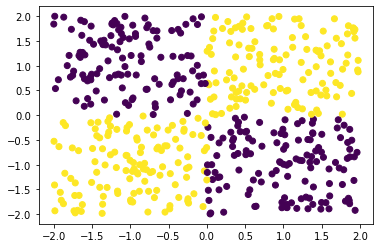

In [562]:
## Part 3

n=500
data = np.zeros((n,3))
x1_vals = np.random.uniform(-2,2,n)
x2_vals = np.random.uniform(-2,2,n)
#x1_vals = np.array([-2,-1.75,-1.5,-.25,-1,-.25,1.5,.6,.8,1.65]).T
#x2_vals = np.array([1.8,-1.4,-.4,.2,.3,-.68,.5,-.5,.9,-.5]).T
data[:,0] = x1_vals
data[:,1] = x2_vals
for i in range(n):
    if x1_vals[i] > 0 and x2_vals[i] > 0:
        data[i,2] = 1
    if x1_vals[i] < 0 and x2_vals[i] < 0:
        data[i,2] = 1

plt.scatter(x1_vals,x2_vals,c=data[:,2])

In [563]:
## Part 4

def loss(y, y_hat):
    y = np.array(y).reshape(y.shape[0],1)
    y_hat = np.array(y_hat).reshape(y_hat.shape[0],1)
    return -(1/y.shape[0])*np.sum((y*np.log(y_hat))+((1-y)*np.log(1-y_hat)))

def grad_descent(x, y, starting_point=None, iterations=100, learning_rate=.01):
    """
    Estimate the coefficients of simple regression model using gradient descent.
    model: y = beta_0 + beta_1*X
    
    Args
        x (np.array) 
        y (np.array)
        starting_point (tuple2) initialization point for gradient descent
        iterations (int) number of iterations before stopping
        learning_rate (float) 
        
    
    Returns
        (np.array) trajectory through parameter space towards minimum
        (np.array) total loss metric throughout gradient descent iterations
    """
    
    if starting_point is None:
        coefficients = np.random.uniform(.1,2,size=17)
        #coefficients = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,.8,.7,.6,.5,.4,.3,.2,.1])
    else:
        coefficients = starting_point
    
    V = coefficients[0:4].reshape(4,1)
    c = coefficients[4]
    B = coefficients[5:9].reshape(1,4)
    W = np.array([[coefficients[9],coefficients[10],coefficients[11],coefficients[12]],
                  [coefficients[13],coefficients[14],coefficients[15],coefficients[16]]])
    
    y_hat = np.array(ff_nn_ReLU(W,B,c,V,x))
    total_loss = [loss(y,y_hat)]
    trajectory = [coefficients]

    for i in range(iterations):
        
        y_hat = ff_nn_ReLU(W,B,c,V,x)
        grad=grad_f(W,B,c,V,x,y,y_hat,n)

        coefficients = coefficients - learning_rate*grad
        
        V = coefficients[0:4].reshape(4,1)
        c = coefficients[4]
        B = coefficients[5:9].reshape(1,4)
        W = np.array([[coefficients[9],coefficients[10],coefficients[11],coefficients[12]],
                  [coefficients[13],coefficients[14],coefficients[15],coefficients[16]]])
        
        this_loss = loss(y,y_hat)
        
        trajectory.append(coefficients)
        total_loss.append(this_loss)
        
    return np.array(trajectory),np.array(total_loss)

Text(0.5, 1.0, 'Loss Progression - No Momentum')

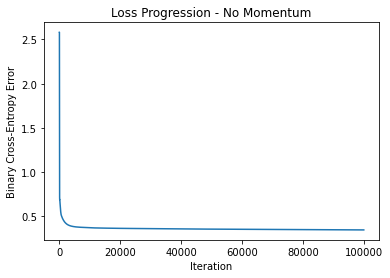

In [576]:
import matplotlib.pyplot as plt

x = data[:,0:2]
y = data[:,2]
#print(data)
traj, losses = grad_descent(x, y, iterations=100000,learning_rate=.03)

plt.plot(losses)
plt.ylabel("Binary Cross-Entropy Error")
plt.xlabel("Iteration")
plt.title('Loss Progression - No Momentum')

In [584]:
def grad_descent_with_mo(x, y, starting_point=None, iterations=1000,alpha=.5,epsilon=.1):
    
    if starting_point is None:
        coefficients = np.random.uniform(.1,2,size=17)
    else:
        coefficients = starting_point
    
    V = coefficients[0:4].reshape(4,1)
    c = coefficients[4]
    B = coefficients[5:9].reshape(1,4)
    W = np.array([[coefficients[9],coefficients[10],coefficients[11],coefficients[12]],
                  [coefficients[13],coefficients[14],coefficients[15],coefficients[16]]])
    
    y_hat = ff_nn_ReLU(W,B,c,V,x)
    
    total_loss = [loss(y,y_hat)]
    trajectory = [coefficients]
    velocity = np.zeros(17)

    for i in range(iterations):
        
        y_hat = ff_nn_ReLU(W,B,c,V,x)
        grad=grad_f(W,B,c,V,x,y,y_hat,n)

        velocity = alpha*velocity + epsilon*grad
        coefficients = coefficients - velocity
        
        
        V = coefficients[0:4].reshape(4,1)
        c = coefficients[4]
        B = coefficients[5:9].reshape(1,4)
        W = np.array([[coefficients[9],coefficients[10],coefficients[11],coefficients[12]],
                  [coefficients[13],coefficients[14],coefficients[15],coefficients[16]]])
        
        this_loss = loss(y,y_hat)
        
        trajectory.append(coefficients)
        total_loss.append(this_loss)
        
    return np.array(trajectory),np.array(total_loss)

Text(0.5, 1.0, 'Loss Progression - with Momentum')

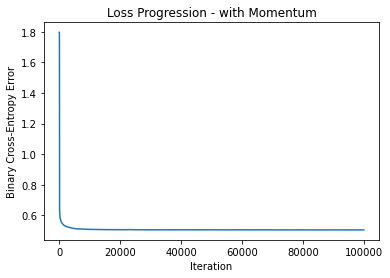

In [588]:
x = data[:,0:2]
y = data[:,2]

traj_mo, losses_mo = grad_descent_with_mo(x, y, iterations=100000,alpha=.5,epsilon=.03)

plt.plot(losses_mo)
plt.ylabel("Binary Cross-Entropy Error")
plt.xlabel("Iteration")
plt.title('Loss Progression - with Momentum')

The algorithm seems to converge with equal efficiency with or without momentum for this run. However, for other initial hyperparameter settings, we might have had much faster convergence when using momentum. I experimented with a bunch of different values of epsilon (learning rate) and alpha (velocity weight), and some combinations showed a bit of an increase in efficiency as compared to the momentum-free model, but I kept it as epsilon=.03 for the submission because it gets to the lowest absolute error.

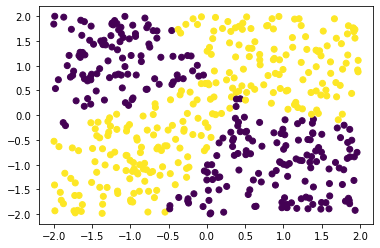

In [590]:
## Part 6
final_coeffs = traj[100000]
V = final_coeffs[0:4].reshape(4,1)
c = final_coeffs[4]
B = final_coeffs[5:9].reshape(1,4)
W = np.array([[final_coeffs[9],final_coeffs[10],final_coeffs[11],final_coeffs[12]],
            [final_coeffs[13],final_coeffs[14],final_coeffs[15],final_coeffs[16]]])
y_hat_final = np.array(ff_nn_ReLU(W,B,c,V,x))
#print(y_hat_final)
y_hat_final[y_hat_final > .5] = 1
y_hat_final[y_hat_final <= .5] = 0
plt.scatter(x1_vals,x2_vals,c=y_hat_final)

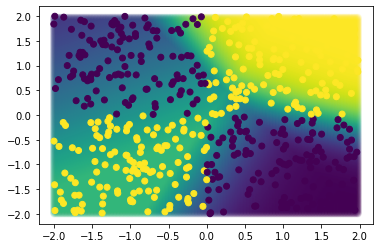

In [578]:
delta = .02
x_ticks = np.arange(-2, 2, delta)
y_ticks = np.arange(-2, 2, delta)
X,Y = np.meshgrid(x_ticks,y_ticks)
coordinate_grid = np.array([X, Y])
bound_x1 = coordinate_grid[0,:,:].reshape(40000,)
bound_x2 = coordinate_grid[1,:,:].reshape(40000,)
grid_points = np.array([bound_x1,bound_x2]).T
boundary = np.array(ff_nn_ReLU(W,B,c,V,grid_points))

plt.scatter(bound_x1,bound_x2,alpha=.1,c=boundary)
plt.scatter(x1_vals,x2_vals,c=data[:,2])

The first plot colors each of our original datapoints with the labels assigned by our model using the final coefficients recommended by the model, allegedly the best coefficients that the model could suggest. The second plot labels each of our original datapoints with their true labels, and the model's boundary area is in transparent colors superimposed on the datapoints. As expected, the model is doing pretty well, and is creeping its decision boundary from top-left and bottom-right towards the center, and the points near the origin are the hardest to predict.